In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

## Regression

In [2]:
regression = pd.read_csv('Results/gridsearch_regression_500_epochs_diff_lambda.csv')

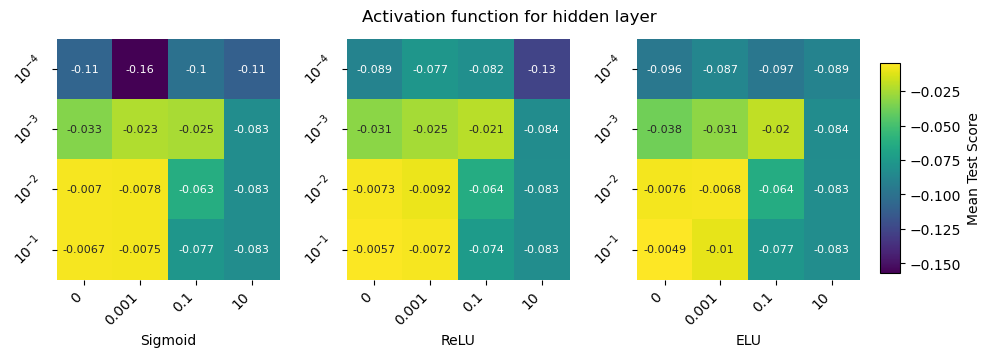

In [5]:
# Epsilon and lambda values
activation_funcs = ["['sigmoid', 'identity']", "['relu', 'identity']", "['elu', 'identity']"]
act_func_name = ['Sigmoid', 'ReLU', 'ELU']

# List to collect all data for normalization
all_data = []

# Collect all data to find the global min and max for normalization
for act in activation_funcs:
    epsilon_vs_lambda = regression[(regression['param_model__activations'] == act)]
    epsilon_vs_lambda_array = epsilon_vs_lambda['mean_test_score'].to_numpy().reshape(4, 4)
    all_data.append(epsilon_vs_lambda_array)

# Find the global min and max for normalization
vmin = np.min([data.min() for data in all_data])
vmax = np.max([data.max() for data in all_data])
norm = Normalize(vmin=vmin, vmax=vmax)

# Create figure for the larger heatmap and colorbar
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
fig.tight_layout()
fig.subplots_adjust(right=0.85, wspace=0.3) 
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])     # add axis for colorbar

# Define row and column names
row_names = [r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$']
col_names = ['0', '0.001', '0.1', '10']

# Plot each smaller heatmap in the larger heatmap cells
for idx, act in enumerate(activation_funcs):
    epsilon_vs_lambda = regression[(regression['param_model__activations'] == act)]
    epsilon_vs_lambda_array = epsilon_vs_lambda['mean_test_score'].to_numpy().reshape(4, 4)

    # Plotting the heatmap
    sns.heatmap(epsilon_vs_lambda_array, ax=axs[idx], cbar=(idx==0), cbar_ax=cbar_ax if (idx==0) else None, 
                norm=norm, annot=True, annot_kws={"fontsize":8}, cmap='viridis')
    
    # Adding column and row names for the heatmaps
    axs[idx].set_xticklabels(col_names, rotation=45, ha='right')
    axs[idx].set_yticklabels(row_names, rotation=45, ha='right')

    axs[idx].set_xlabel(f'{act_func_name[idx]}')

# Set colorbar label
cbar = fig.colorbar(axs[0].collections[0], cax=cbar_ax)
cbar.set_label('Mean Test Score')

plt.show()

## Wisconsin Breast Cancer

In [2]:
one_layer = pd.read_csv('Results/gridsearch_wisconsin_50_epochs.csv')
two_layers = pd.read_csv('Results/gridsearch_wisconsin_two_layers_50_epochs.csv')

### One hidden layer

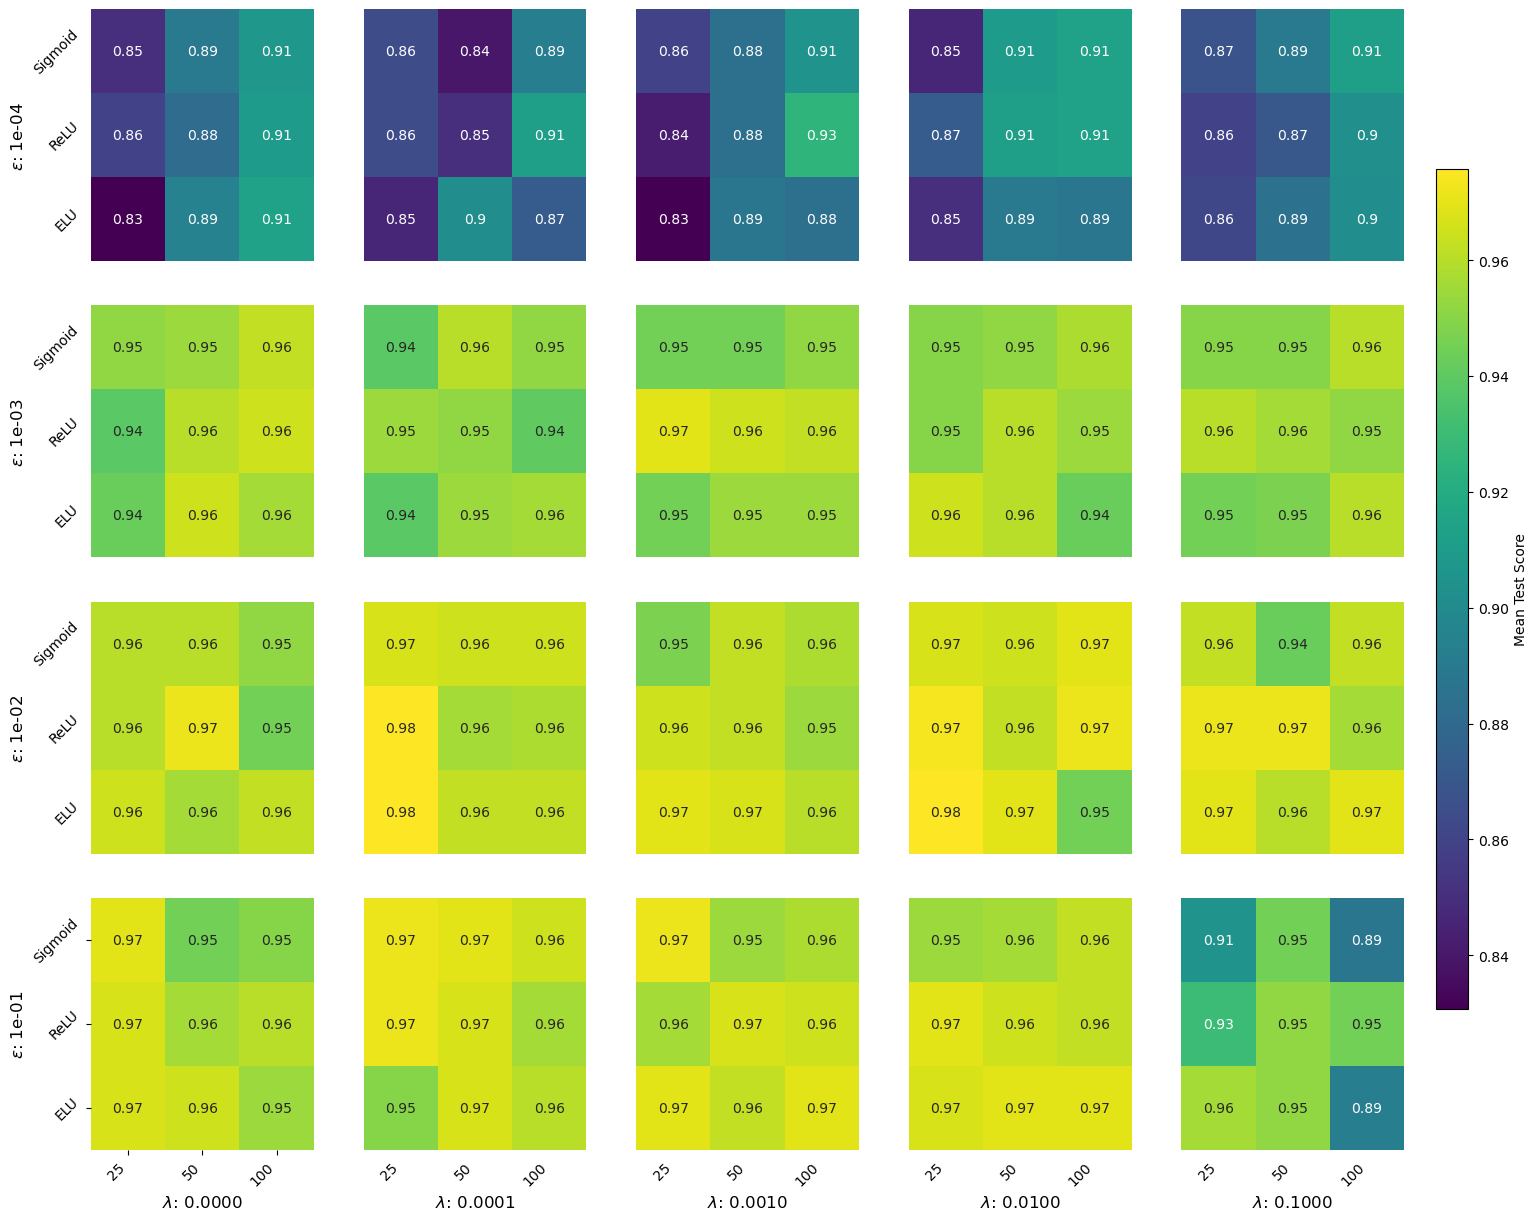

In [47]:
# Epsilon and lambda values
epsilon_vals = np.logspace(-4, -1, 4)
llambda_vals = [0.0, 0.0001, 0.001, 0.01, 0.1]

# List to collect all data for normalization
all_data = []

# Collect all data to find the global min and max for normalization
for epsilon in epsilon_vals:
    for llambda in llambda_vals:
        nodes_vs_activations = one_layer[(one_layer['param_model__epsilon'] == epsilon) & (one_layer['param_model__llambda'] == llambda)]
        nodes_vs_activations_array = nodes_vs_activations['mean_test_score'].to_numpy().reshape(3, 3)
        all_data.append(nodes_vs_activations_array)

# Find the global min and max for normalization
vmin = np.min([data.min() for data in all_data])
vmax = np.max([data.max() for data in all_data])
norm = Normalize(vmin=vmin, vmax=vmax)

# Create figure for the larger heatmap and colorbar
fig, axs = plt.subplots(4, 5, figsize=(16, 12))
fig.tight_layout()
fig.subplots_adjust(right=0.85) 
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])     # add axis for colorbar

# Define row and column names
row_names = ['Sigmoid', 'ReLU', 'ELU']
col_names = ['25', '50', '100']

# Plot each smaller heatmap in the larger heatmap cells
for idx, epsilon in enumerate(epsilon_vals):
    for idy, llambda in enumerate(llambda_vals):
        nodes_vs_activations = one_layer[(one_layer['param_model__epsilon'] == epsilon) & (one_layer['param_model__llambda'] == llambda)]
        nodes_vs_activations_array = nodes_vs_activations['mean_test_score'].to_numpy().reshape(3, 3)

        # Plotting the heatmap
        sns.heatmap(nodes_vs_activations_array, ax=axs[idx, idy], cbar=(idx==0 and idy==0), cbar_ax=cbar_ax if (idx==0 and idy==0) else None, 
                    norm=norm, annot=True, cmap='viridis')

        # Adding column and row names for the heatmaps
        if idx == 3:
            axs[idx, idy].set_xticklabels(col_names, rotation=45, ha='right')
        else: 
            axs[idx, idy].tick_params(left=False, bottom=False)
            axs[idx, idy].set_xticklabels([], rotation=45, ha='right')
        if idy == 0:
            axs[idx, idy].set_yticklabels(row_names, rotation=45, ha='right')
        else:
            axs[idx, idy].tick_params(left=False, bottom=False)
            axs[idx, idy].set_yticklabels([], rotation=45, ha='right')

        # Set labels for lambda and epsilon values
        if idy == 0:
            axs[idx, idy].set_ylabel(rf'$\epsilon$: {epsilon:.0e}', size='large')
        if idx == 3:
            axs[idx, idy].set_xlabel(rf'$\lambda$: {llambda:.4f}', size='large')

# Set colorbar label
cbar = fig.colorbar(axs[0,0].collections[0], cax=cbar_ax)
cbar.set_label('Mean Test Score')

plt.show()

### Two hidden layers

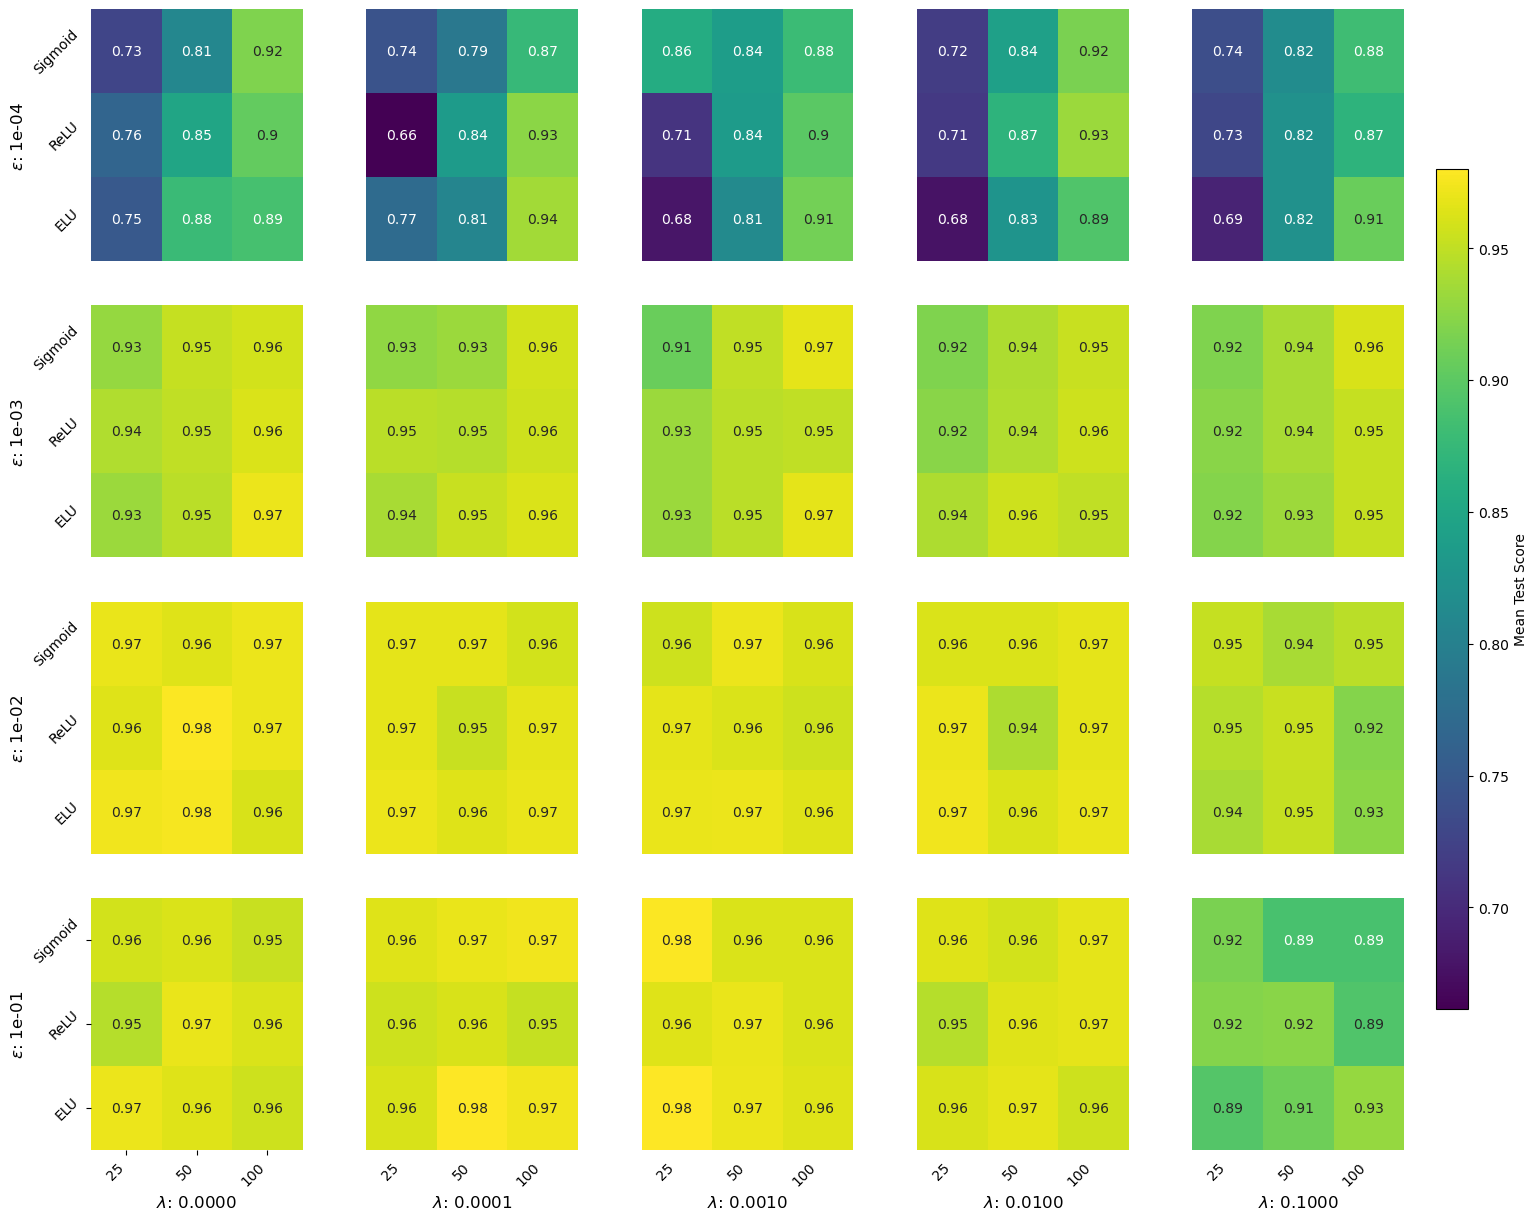

In [48]:
# Epsilon and lambda values
epsilon_vals = np.logspace(-4, -1, 4)
llambda_vals = [0.0, 0.0001, 0.001, 0.01, 0.1]

# List to collect all data for normalization
all_data = []

# Collect all data to find the global min and max for normalization
for epsilon in epsilon_vals:
    for llambda in llambda_vals:
        nodes_vs_activations = two_layers[(two_layers['param_model__epsilon'] == epsilon) & (two_layers['param_model__llambda'] == llambda)]
        nodes_vs_activations_array = nodes_vs_activations['mean_test_score'].to_numpy().reshape(3, 3)
        all_data.append(nodes_vs_activations_array)

# Find the global min and max for normalization
vmin = np.min([data.min() for data in all_data])
vmax = np.max([data.max() for data in all_data])
norm = Normalize(vmin=vmin, vmax=vmax)

# Create figure for the larger heatmap and colorbar
fig, axs = plt.subplots(4, 5, figsize=(16, 12))
fig.tight_layout()
fig.subplots_adjust(right=0.85, wspace=0.3) 
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])     # add axis for colorbar

# Define row and column names
row_names = ['Sigmoid', 'ReLU', 'ELU']
col_names = ['25', '50', '100']

# Plot each smaller heatmap in the larger heatmap cells
for idx, epsilon in enumerate(epsilon_vals):
    for idy, llambda in enumerate(llambda_vals):
        nodes_vs_activations = two_layers[(two_layers['param_model__epsilon'] == epsilon) & (two_layers['param_model__llambda'] == llambda)]
        nodes_vs_activations_array = nodes_vs_activations['mean_test_score'].to_numpy().reshape(3, 3)

        # Plotting the heatmap
        sns.heatmap(nodes_vs_activations_array, ax=axs[idx, idy], cbar=(idx==0 and idy==0), cbar_ax=cbar_ax if (idx==0 and idy==0) else None, 
                    norm=norm, annot=True, cmap='viridis')
        
        # Adding column and row names for the heatmaps
        if idx == 3:
            axs[idx, idy].set_xticklabels(col_names, rotation=45, ha='right')
        else: 
            axs[idx, idy].tick_params(left=False, bottom=False)
            axs[idx, idy].set_xticklabels([], rotation=45, ha='right')
        if idy == 0:
            axs[idx, idy].set_yticklabels(row_names, rotation=45, ha='right')
        else:
            axs[idx, idy].tick_params(left=False, bottom=False)
            axs[idx, idy].set_yticklabels([], rotation=45, ha='right')

        # Set labels for lambda and epsilon values
        if idy == 0:
            axs[idx, idy].set_ylabel(rf'$\epsilon$: {epsilon:.0e}', size='large')
        if idx == 3:
            axs[idx, idy].set_xlabel(rf'$\lambda$: {llambda:.4f}', size='large')

# Set colorbar label
cbar = fig.colorbar(axs[0,0].collections[0], cax=cbar_ax)
cbar.set_label('Mean Test Score')

plt.show()